Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('patients.csv')


#quick info
print(df.info())

print(df.describe())

print(df.isnull().sum())

print(df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+

In [2]:
#convert to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# This will give you real times
df['ScheduledHour'] = df['ScheduledDay'].dt.hour

# This will always be 0
df['AppointmentHour'] = df['AppointmentDay'].dt.hour

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,AppointmentHour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,0


In [3]:
#create new columns for day/month/ and fixing any errors
df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df['DaysBetween'] = df['DaysBetween'].clip(lower=0)
df['ScheduledWeekday'] = df['ScheduledDay'].dt.dayofweek  # 0=Monday
df['AppointmentWeekday'] = df['AppointmentDay'].dt.dayofweek
df['AppointmentMonth'] = df['AppointmentDay'].dt.month

df[df['DaysBetween'] > 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,AppointmentHour,DaysBetween,ScheduledWeekday,AppointmentWeekday,AppointmentMonth
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,8,0,1,2,4,4
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15,0,1,2,4,4
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15,0,1,2,4,4
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,12,0,1,2,4,4
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,14,0,1,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,9,0,34,1,1,6
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,7,0,34,1,1,6
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,16,0,40,2,1,6
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,15,0,40,2,1,6


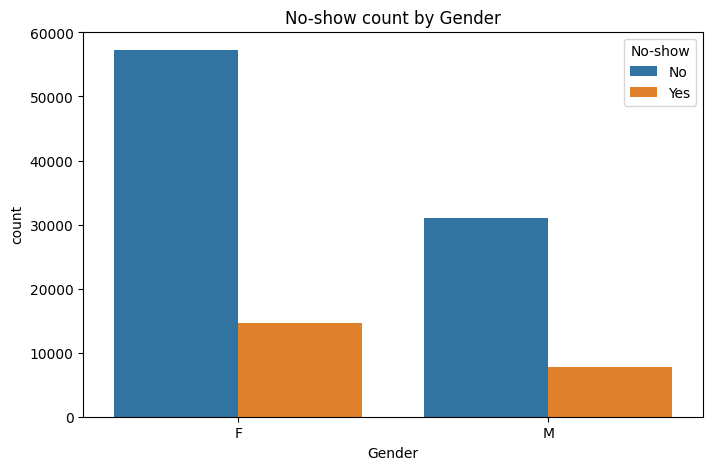

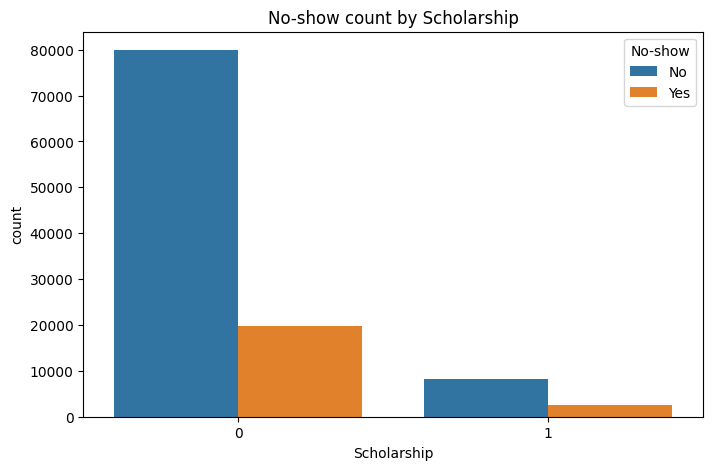

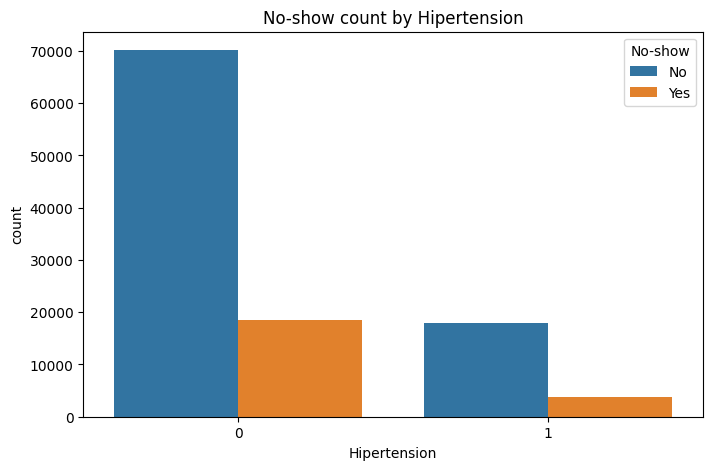

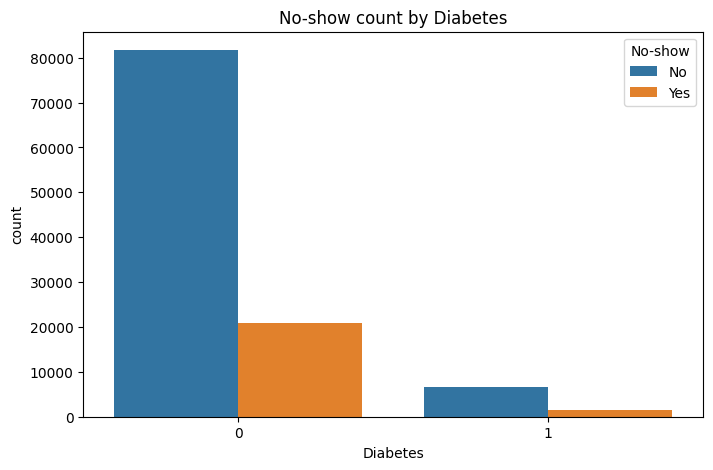

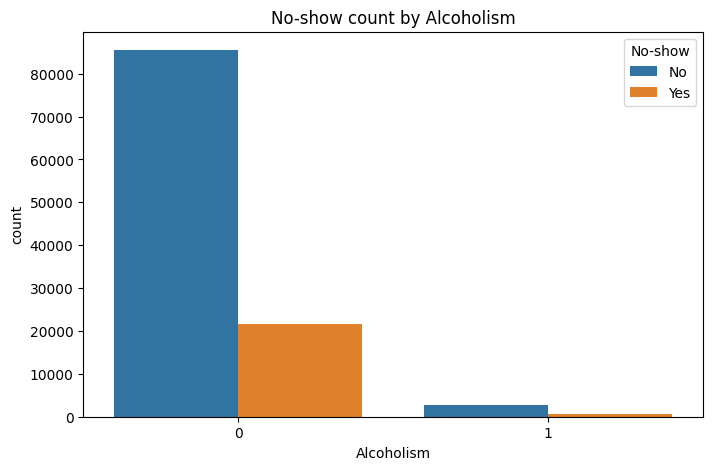

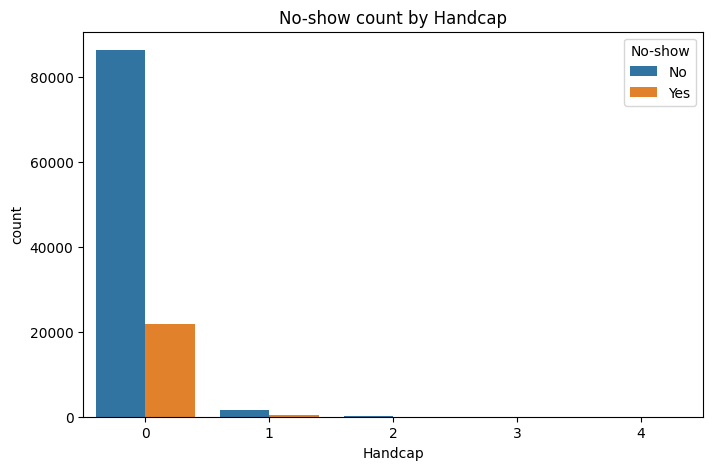

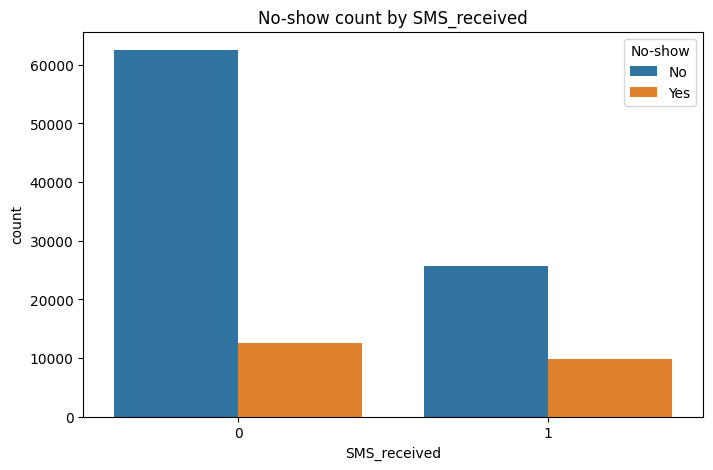

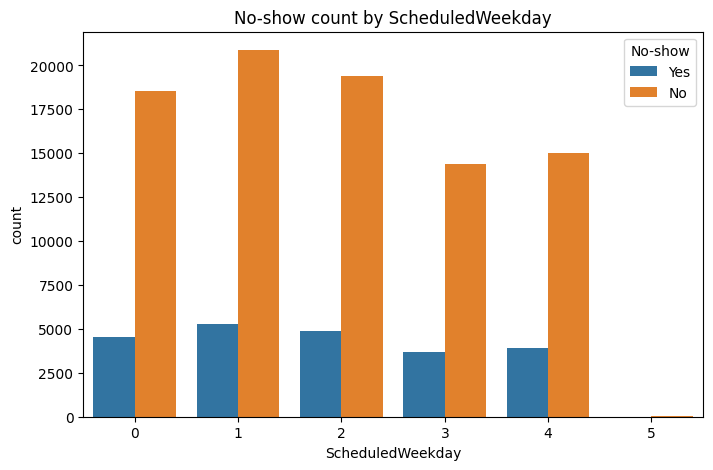

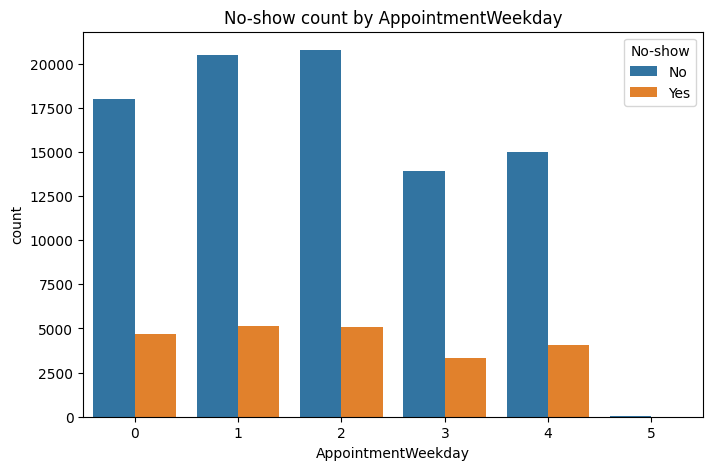

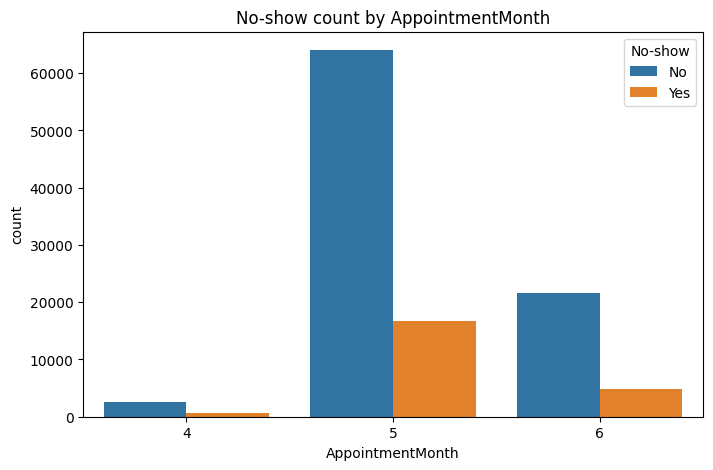

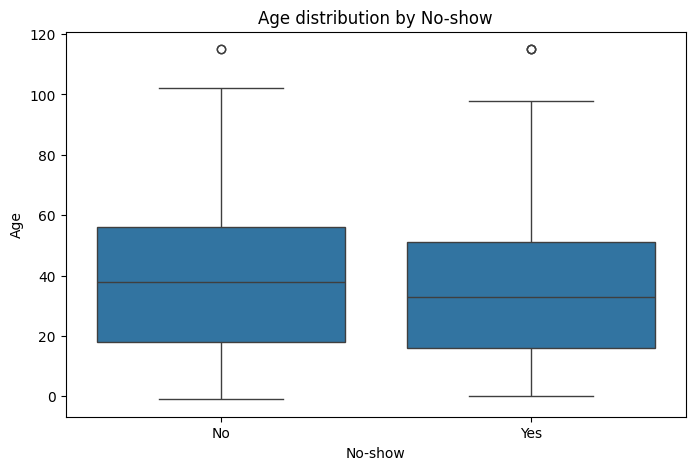

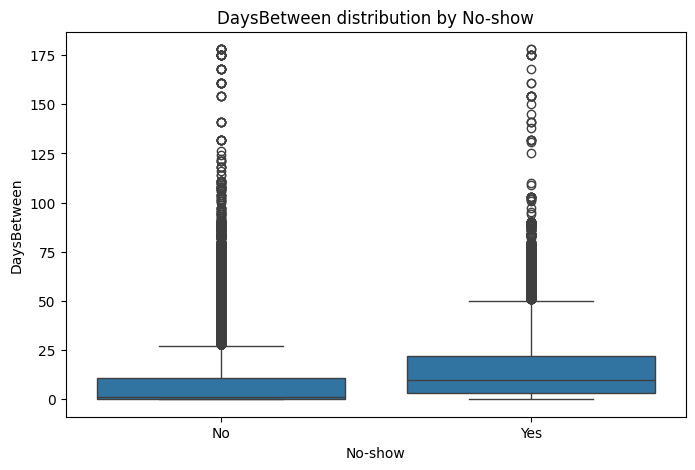

Correlation with No-show:
No-show_numeric       1.000000
DaysBetween           0.180074
SMS_received          0.126431
ScheduledHour         0.060697
Scholarship           0.029135
ScheduledWeekday      0.006020
AppointmentWeekday    0.001165
Alcoholism           -0.000196
PatientId            -0.001461
Handcap              -0.006076
Diabetes             -0.015180
AppointmentMonth     -0.020886
Hipertension         -0.035701
Age                  -0.060319
AppointmentID        -0.162602
AppointmentHour            NaN
Name: No-show_numeric, dtype: float64


In [4]:
# Convert 'No-show' to numerical for correlation analysis (1 for Yes, 0 for No)
df['No-show_numeric'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Explore the relationship between 'No-show' and categorical features using countplots
categorical_features = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'ScheduledWeekday', 'AppointmentWeekday', 'AppointmentMonth']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='No-show', data=df)
    plt.title(f'No-show count by {feature}')
    plt.show()

# Explore the relationship between 'No-show' and numerical features using boxplots
numerical_features = ['Age', 'DaysBetween']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='No-show', y=feature, data=df)
    plt.title(f'{feature} distribution by No-show')
    plt.show()

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation of features with 'No-show_numeric'
print("Correlation with No-show:")
print(correlation_matrix['No-show_numeric'].sort_values(ascending=False))